In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pyqg
import cmocean
from pyqg_generative.tools.plot_helpers import *
from pyqg_generative.tools.operators import ave_lev
import pyqg_generative.tools.operators as op
from pyqg_generative.tools.parameters import EDDY_PARAMS
from pyqg_generative.tools.spectral_tools import calc_ispec, coord, spectrum
from pyqg_generative.tools.comparison_tools import dataset_statistics, coarsegrain_reference_dataset, dataset_smart_read
%load_ext autoreload
%autoreload 3

import hvplot.xarray
import holoviews as hv
hvplot.output(widget_location='bottom')

import warnings
warnings.filterwarnings("ignore")

# Coarsegraining for online data

In [3]:
ds = xr.open_mfdataset(
        f'/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_1024/[0-9].nc', 
        decode_times=False, concat_dim='run', combine='nested').load()

In [4]:
coarsegrain_reference_dataset(ds, 48, 'Operator1').to_netcdf(f'/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_1024/Operator1-48.nc')

var=q
var=u
var=v
var=psi


# Coarsegraining for offline data

In [6]:
for run in range(10):
    q = xr.open_mfdataset(
        f'/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_1024/{run}.nc', 
        decode_times=False).q.isel(time=slice(0,86)).load()
    ds = {}
    ds['48'] = []
    ds['64'] = []
    ds['96'] = []
    for time in range(q.time.size):
        q0 = q.isel(time=time).values
        def compute_SGS(nc):
            forcing, mf, _ = op.PV_subgrid_forcing(q0, nc, op.Operator1, EDDY_PARAMS)
            snapshot = (mf.to_dataset()[['u','v','q','p']]).rename({'p': 'psi'}).astype('float32')
            snapshot['q_subgrid_forcing'] = xr.DataArray(forcing, dims=['lev', 'y', 'x']).astype('float32')
            del mf
            return snapshot
        
        ds['48'].append(compute_SGS(48))
        ds['64'].append(compute_SGS(64))
        ds['96'].append(compute_SGS(96))
        if time%1 == 0:
           print(f'run={run}, time={time}')
    for key in ['48', '64', '96']:
        ds[key] = xr.concat(ds[key], dim='time')
        ds[key].to_netcdf(f'/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_1024/Operator1-{key}/{run}.nc')

run=0, time=0
run=0, time=1
run=0, time=2
run=0, time=3
run=0, time=4
run=0, time=5
run=0, time=6
run=0, time=7
run=0, time=8
run=0, time=9
run=0, time=10
run=0, time=11
run=0, time=12
run=0, time=13
run=0, time=14
run=0, time=15
run=0, time=16
run=0, time=17
run=0, time=18
run=0, time=19
run=0, time=20
run=0, time=21
run=0, time=22
run=0, time=23
run=0, time=24
run=0, time=25
run=0, time=26
run=0, time=27
run=0, time=28
run=0, time=29
run=0, time=30
run=0, time=31
run=0, time=32
run=0, time=33
run=0, time=34
run=0, time=35
run=0, time=36
run=0, time=37
run=0, time=38
run=0, time=39
run=0, time=40
run=0, time=41
run=0, time=42
run=0, time=43
run=0, time=44
run=0, time=45
run=0, time=46
run=0, time=47
run=0, time=48
run=0, time=49
run=0, time=50
run=0, time=51
run=0, time=52
run=0, time=53
run=0, time=54
run=0, time=55
run=0, time=56
run=0, time=57
run=0, time=58
run=0, time=59
run=0, time=60
run=0, time=61
run=0, time=62
run=0, time=63
run=0, time=64
run=0, time=65
run=0, time=66
run=0

run=6, time=35
run=6, time=36
run=6, time=37
run=6, time=38
run=6, time=39
run=6, time=40
run=6, time=41
run=6, time=42
run=6, time=43
run=6, time=44
run=6, time=45
run=6, time=46
run=6, time=47
run=6, time=48
run=6, time=49
run=6, time=50
run=6, time=51
run=6, time=52
run=6, time=53
run=6, time=54
run=6, time=55
run=6, time=56
run=6, time=57
run=6, time=58
run=6, time=59
run=6, time=60
run=6, time=61
run=6, time=62
run=6, time=63
run=6, time=64
run=6, time=65
run=6, time=66
run=6, time=67
run=6, time=68
run=6, time=69
run=6, time=70
run=6, time=71
run=6, time=72
run=6, time=73
run=6, time=74
run=6, time=75
run=6, time=76
run=6, time=77
run=6, time=78
run=6, time=79
run=6, time=80
run=6, time=81
run=6, time=82
run=6, time=83
run=6, time=84
run=6, time=85
run=7, time=0
run=7, time=1
run=7, time=2
run=7, time=3
run=7, time=4
run=7, time=5
run=7, time=6
run=7, time=7
run=7, time=8
run=7, time=9
run=7, time=10
run=7, time=11
run=7, time=12
run=7, time=13
run=7, time=14
run=7, time=15
run=7

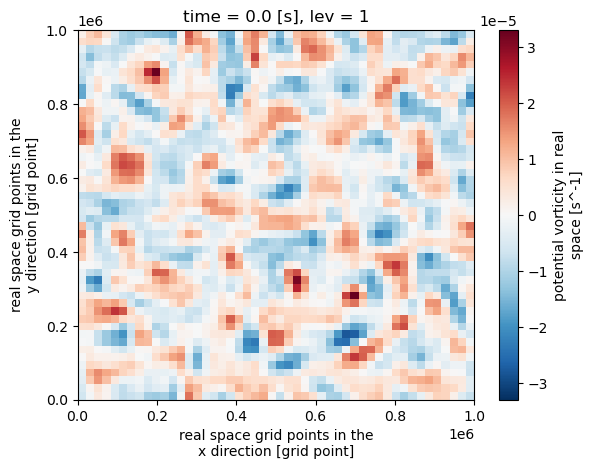

In [8]:
xr.open_dataset(
    f'/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_1024/Operator1-48/0.nc').q.isel(time=-1,lev=0).plot()

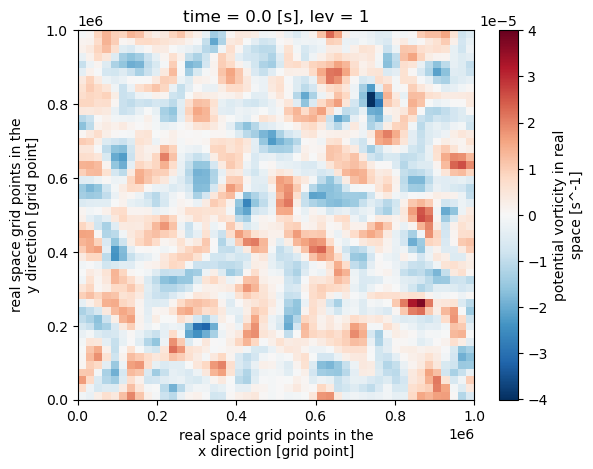

In [11]:
xr.open_dataset(
    f'/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_1024/Operator1-48/3.nc').q.isel(time=-10,lev=0).plot()

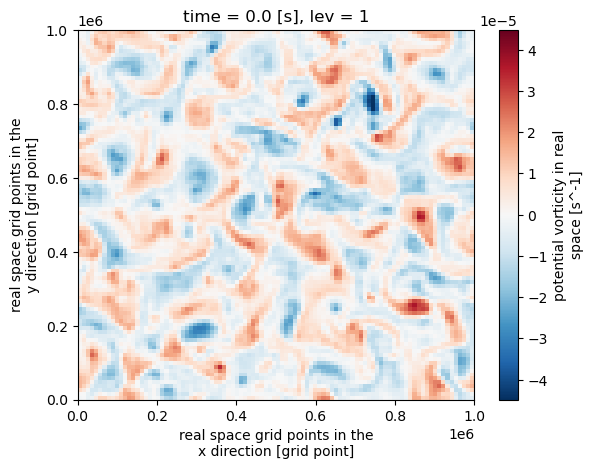

In [12]:
xr.open_dataset(
    f'/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_1024/Operator1-96/3.nc').q.isel(time=-10,lev=0).plot()

# Offline metrics on hires subgrid forcing

In [5]:
def read_metric(metric='L2_mean', model='OLSModel', model_num=0, resolution=64, operator='Operator1', exp='offline_test.nc', folder='models_retrain'):
    file = os.path.join('/scratch/pp2681/pyqg_generative/Reference-Default-scaled', folder, operator+'-'+str(resolution),model+'-'+str(model_num),exp)
    if os.path.exists(file):
        ds = xr.open_dataset(file)
        return float(ds[metric].mean())
    else:
        print('Wrong path', file)

In [6]:
def read_line(**kw):
    res = [48, 64, 96]
    y = np.array([[read_metric(model_num=j, resolution=r, **kw) for j in range(5)] for r in res])
    res = xr.DataArray(res)
    trial = xr.DataArray(np.arange(5))
    y = xr.DataArray(y, dims=['res', 'trial'], coords=[res, trial])
    outlier = y * np.nan
    if kw['operator'] == 'Operator1' and kw['model'] in ['OLSModel', 'MeanVarModel', 'CGANRegression']:
        outlier[0,3] = y[0,3]
        y[0,3] = np.nan
    if kw['operator'] == 'Operator1' and kw['model'] in ['CVAERegression-None']:
        outlier[1,2:4] = y[1,2:4]
        y[1,2:4] = np.nan
    
    q25 = y.quantile(0.25, dim='trial', skipna=True).drop_vars('quantile')
    q50 = y.quantile(0.5, dim='trial', skipna=True).drop_vars('quantile')
    q75 = y.quantile(0.75, dim='trial', skipna=True).drop_vars('quantile')
    q0 = y.min(dim='trial', skipna=True)
    q100 = y.max(dim='trial', skipna=True)
    return xr.Dataset({'data': y, 'outlier': outlier, 'q25': q25, 'q50': q50, 'q75': q75, 'q0': q0, 'q100': q100})

Text(0.5, 1.1, 'Sharp filter')

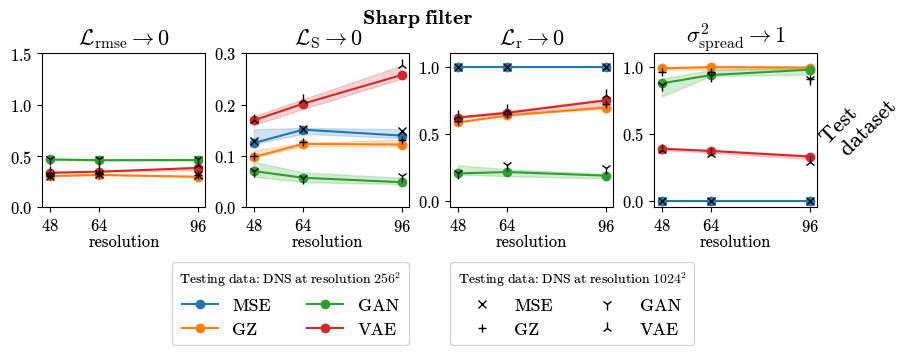

In [7]:
default_rcParams({
    'axes.formatter.limits': (-2,2),
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.labelsize': 12,
    'axes.titlelocation' : 'center'})
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
fig, axs = plt.subplots(1,4,figsize=(10,2))
axs = [axs]
plt.subplots_adjust(hspace=0.15, wspace=0.25)
operator = 'Operator1'
for i, exp in enumerate(['offline_test.nc']):
    for j, (model, label) in enumerate(zip(['OLSModel', 'MeanVarModel', 'CGANRegression-retrain', 'CVAERegression-None'], ['MSE', 'GZ', 'GAN', 'VAE'])):
        res = [48, 64, 96]
        for col, metric in enumerate(['L2_mean', 'L2_total', 'L2_residual', 'var_ratio']):
            ds= read_line(metric=metric, model=model, operator=operator, exp=exp)
            ax = axs[i][col]
            if metric != 'L2_mean' or label != 'MSE':                
                ax.plot(res, ds.q50, color=colors[j], marker='o', label=label if col==2 else None)
                ax.fill_between(res, ds.q0, ds.q100, color=colors[j], alpha=0.2)
            
          
            y = np.array([read_metric(model=model, metric=metric, 
                                      model_num=0, resolution=r, exp='offline_test_1024.nc') for r in res])
            marker = {'MSE': 'x', 'GZ': '+', 'GAN': "1", 'VAE': "2"}
            ax.plot(res, y, ls='', color='k', marker=marker[label],label=label if col==1 else None,zorder=4,markersize=6 if label in ['MSE', 'GZ'] else 8)

        
for j in range(4):
    axs[0][j].set_xlabel('resolution')
    axs[0][j].set_xticks([48, 64, 96])
    
axs[0][0].set_ylim([0.0, 1.5])
axs[0][1].set_ylim([0, 0.3])
axs[0][2].set_ylim([-0.05, 1.1])
axs[0][3].set_ylim([-0.05, 1.1])

axs[0][0].set_title(r'$\mathcal{L}_{\mathrm{rmse}} \rightarrow 0$')
axs[0][1].set_title(r'$\mathcal{L}_{\mathrm{S}} \rightarrow 0$')
axs[0][2].set_title(r'$\mathcal{L}_{\mathrm{r}} \rightarrow 0$')
axs[0][3].set_title(r'$\sigma^2_{\mathrm{spread}} \rightarrow 1$')

axs[0][2].legend(bbox_to_anchor=(-0.2,-0.3), ncol=2, fontsize=13, title='Testing data: DNS at resolution $256^2$')
axs[0][1].legend(bbox_to_anchor=(2.8,-0.3), ncol=2, fontsize=13, title='Testing data: DNS at resolution $1024^2$')

fig.text(0.9, 0.35, 'Test \n dataset', fontsize=16, rotation=45)
plt.suptitle('Sharp filter', y=1.1, fontweight='bold', fontsize=14)
#plt.show()
#plt.savefig('review_figures/offline-metrics-1024.pdf')

# Online performance

In [19]:
def plot_online(operator='Operator1', resolution=48, exp='eddy-7200-constant-0', ref='reference_7200_48', delta=0.25, read_cache=True):
    def read_experiment(model='OLSModel', model_num=0, resolution=64, operator='Operator1', exp=exp, read_cache=read_cache, delta=delta):
        folder = os.path.join('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_retrain', operator+'-'+str(resolution),model+'-'+str(model_num),exp)
        path = os.path.join(folder,'[0-9].nc')

        keyphrase = 'Warning: CFL>1. Computations are stopped.'
        err = os.path.join(folder, '*err*')
        os.system(f'cat {err} | grep "{keyphrase}"')

        ds = dataset_smart_read(path, read_cache=read_cache, delta=delta)
        return ds.isel(time=slice(0,None,2))

    def collapse_trials(**kw):
        ds = []
        for j in range(5):
            if kw['resolution']==48 and kw['operator'] == 'Operator1' and kw['model'] in ['OLSModel', 'MeanVarModel', 'CGANRegression'] and j==3:
                continue
            if kw['resolution']==64 and kw['operator'] == 'Operator1' and kw['model'] in ['CVAERegression-None'] and j in [2,3]:
                continue
            if kw['resolution']==96 and kw['operator'] == 'Operator1' and kw['model'] in ['CVAERegression-None'] and j in [4]:
                continue
            if kw['resolution']==96 and kw['operator'] == 'Operator2' and kw['model'] in ['CGANRegression-retrain'] and j in [1, 3, 4]:
                continue
            ds.append(read_experiment(model_num=j, **kw))
        ds = xr.concat(ds, dim='trial')

        return ds

    mse = collapse_trials(resolution=resolution, operator=operator, model='OLSModel')
    gz = collapse_trials(resolution=resolution, operator=operator, model='MeanVarModel')
    gan = collapse_trials(resolution=resolution, operator=operator, model='CGANRegression-retrain')
    vae = collapse_trials(resolution=resolution, operator=operator, model='CVAERegression-None')
    
    target = dataset_smart_read(f'/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/{operator}-{str(resolution)}.nc', delta=delta, read_cache=read_cache).isel(time=slice(0,None,2))
    target_1024 = dataset_smart_read(f'/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_1024/{operator}-{str(resolution)}.nc', delta=delta, read_cache=read_cache).isel(time=slice(0,None,2))
    coarse = dataset_smart_read(f'/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/{ref}/[0-9].nc', delta=delta, read_cache=read_cache).isel(time=slice(0,None,2))

    default_rcParams(
        {'lines.linewidth': 2,
         'font.size': 12,
         'axes.labelsize': 12,
         'axes.titlesize': 12,
         'xtick.labelsize': 12,
         'ytick.labelsize': 12,
         'legend.fontsize': 12})
    fig, axs = plt.subplots(3,2,figsize=(8,8))
    plt.subplots_adjust(hspace=0.55)
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    lss = ['-', '--', '-.', ':']
    lws = [None, None, None, None]
    alphas = [0.2, 0.2, 0.2, 0.2]
    hatch = [None, None, None, None]
    models = [mse, gz, gan, vae]
    labels=['MSE', 'GZ', 'GAN', 'VAE']

    ax = axs[0][0]
    target.KE_time.plot(ax=ax, color='k', ls='-', lw=1)
    target_1024.KE_time.plot(ax=ax, color=[0.3010, 0.7450, 0.9330], ls='--', lw=3)
    coarse.KE_time.plot(ax=ax, color='gray')
    for j, m in enumerate(models):
        m.KE_time.median('trial').plot(ax=ax, color=colors[j], ls=lss[j], lw=lws[j])
        ax.fill_between(m.time, m.KE_time.min('trial'), m.KE_time.max('trial'), color=colors[j], alpha=alphas[j], edgecolor=None)
    ax.set_ylabel(r'$E, m^2/s^2$')
    ax.set_xlabel('t, $years$')
    ax.set_title('Kinetic energy')
    ax.set_ylim([-0.2e-4, 8.5e-4])

    ax = axs[1][0]
    (0.5*target.KEspecr_mean).plot(ax=ax, color='k', ls='-', lw=1)
    (0.5*target_1024.KEspecr_mean).plot(ax=ax, color=[0.3010, 0.7450, 0.9330], ls='--', lw=3)
    (0.5*coarse.KEspecr_mean).plot(ax=ax, color='gray')
    for j, m in enumerate(models):
        (0.5*m.KEspecr_mean.median('trial')).plot(ax=ax, color=colors[j], ls=lss[j], lw=lws[j])
        ax.fill_between(m.kr, 0.5*m.KEspecr_mean.min('trial'), 0.5*m.KEspecr_mean.max('trial'), color=colors[j], alpha=alphas[j], edgecolor=None)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim([5e-2, 2e+1])
    ax.set_ylabel('$E(\kappa), m^3/s^2$')
    ax.set_xlabel(r'wavenumber $\kappa, m^{-1}$')
    ax.set_title('KE spectrum')

    ax = axs[2][0]
    target.Efluxr.plot(ax=ax, color='k', ls='-', lw=1)
    target_1024.Efluxr.plot(ax=ax, color=[0.3010, 0.7450, 0.9330], ls='--', lw=3)
    coarse.Efluxr.plot(ax=ax, color='gray')
    for j, m in enumerate(models):
        m.Efluxr.median('trial').plot(ax=ax, color=colors[j], ls=lss[j], lw=lws[j])
        ax.fill_between(m.kr, m.Efluxr.min('trial'), m.Efluxr.max('trial'), color=colors[j], alpha=alphas[j], edgecolor=None)
    ax.set_xscale('log')
    ax.set_ylim([-1.3e-6, 1.3e-6])
    ax.set_ylabel(r'$\partial_t \mathcal{E}(\kappa), m^3/s^3$')
    ax.set_xlabel(r'wavenumber $\kappa, m^{-1}$')
    ax.set_title('Energy transfer')

    for col,var in enumerate(['PDF_Ens1', 'PDF_KE1', 'PDF_KE2']):
        ax=axs[col][1]
        target[var].plot(ax=ax, color='k', ls='-', lw=1, label=r'$\overline{\mathrm{hires}} (256^2)$')
        target_1024[var].plot(ax=ax, color=[0.3010, 0.7450, 0.9330], ls='--', lw=3, label=r'$\overline{\mathrm{hires}} (1024^2)$')
        coarse[var].plot(ax=ax, color='gray', label='lores')

        for j, m in enumerate(models):
            m[var].median('trial').plot(ax=ax, color=colors[j], ls=lss[j], lw=lws[j], label=labels[j])
            xx=[k for k in m[var].median('trial').coords.values()][0]
            ax.fill_between(xx, m[var].min('trial'), m[var].max('trial'), color=colors[j], alpha=alphas[j], edgecolor=None)
            ax.set_yscale('log')

    ax = axs[0][1]
    ax.set_ylabel('PDF density')
    ax.set_xlabel(r'$\frac{1}{2}|\mathrm{curl}(\mathbf{u}_1)|^2, s^{-2}$')
    ax.set_title('Upper enstrophy')

    ax = axs[1][1]
    ax.set_ylabel('PDF density')
    ax.set_xlabel(r'$\frac{1}{2}|\mathbf{u}_1|^2, m^2s^{-2}$')
    ax.set_title('Upper KE')

    ax = axs[2][1]
    ax.set_ylabel('PDF density')
    ax.set_xlabel(r'$\frac{1}{2}|\mathbf{u}_2|^2, m^2s^{-2}$')
    ax.set_title('Lower KE')

    axs[0][1].set_ylim([1e+7, 4e+11])
    axs[0][1].set_yticks([1e+7,1e+8,1e+9,1e+10,1e+11])
    axs[1][1].set_ylim([1e+0, 1e+3])
    axs[2][1].set_ylim([1e+1, 8e+4])
    axs[2][1].set_yticks([1e+1,1e+2,1e+3,1e+4])

    axs[2][1].set_xticks([0, 1e-4, 2e-4, 3e-4, 4e-4])

    axs[2][1].legend(bbox_to_anchor=(0.55,-0.35), ncol=3)

    fig.align_ylabels()
    set_letters(x=-0.2, y=1.1, fontsize=13, letters=['a', 'd', 'b', 'e', 'c', 'f'])

CPU times: user 54.1 s, sys: 3.65 s, total: 57.8 s
Wall time: 1min 15s


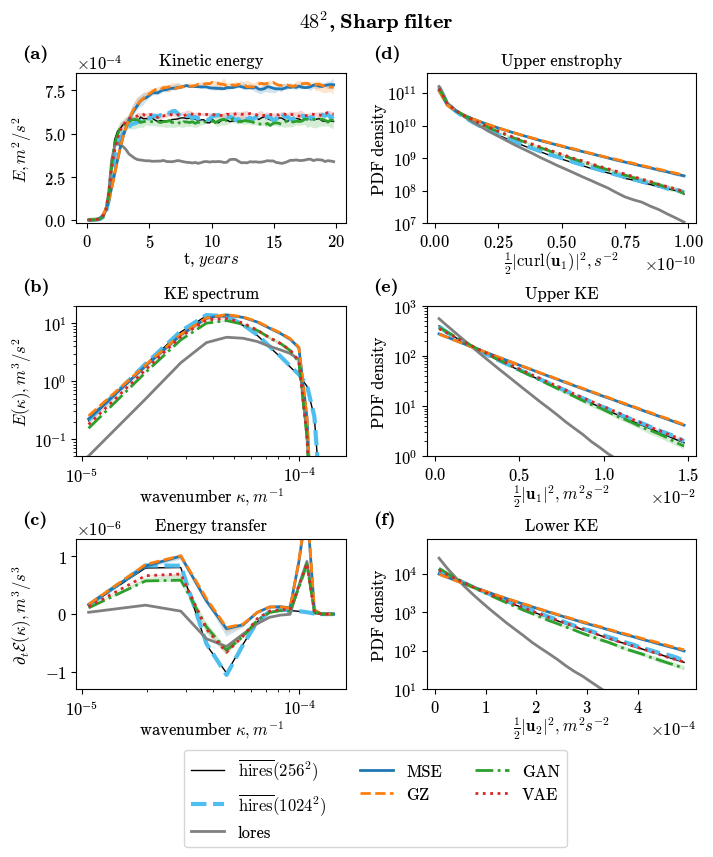

In [20]:
%%time 
plot_online()
plt.suptitle('$48^2$, Sharp filter', y=0.96, fontweight='bold')
plt.savefig('online_LES_hires_1024.pdf')